('IUIUF00030011366',
 {'input': [{'feat': '/home/nlp/ASR/espnet/egs/FSW/dump/test/deltafalse/feats.1.ark:494577',
    'name': 'input1',
    'shape': [473, 83]}],
  'output': [{'name': 'target1',
    'shape': [6, 3010],
    'text': '雖罔我少年，',
    'token': '雖 罔 我 少 年 ，',
    'tokenid': '2812 2125 1061 825 904 2985'}],
  'utt2spk': 'IUIUF00030011366'})

/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 mi

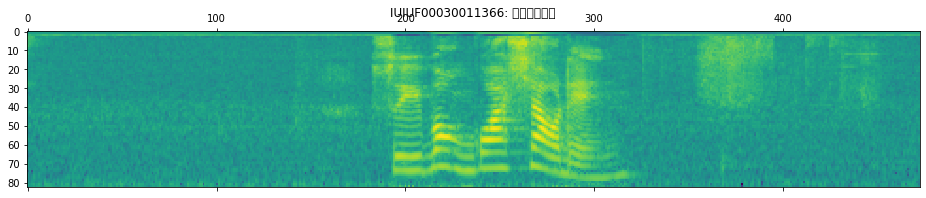

In [4]:
import json
import matplotlib.pyplot as plt
import kaldiio

# load 10-th speech/text in data.json
root = "."
with open(root + "/dump/test/deltafalse/data.json", "r",encoding='utf-8') as f:
    test_json = json.load(f)["utts"]

key, info = list(test_json.items())[10]

# plot the speech feature
fbank = kaldiio.load_mat(info["input"][0]["feat"])
plt.matshow(fbank.T[::-1])
plt.title(key + ": " + info["output"][0]["text"])

# print the key-value pair
key, info

Text(0.5, 1.05, 'IUF0003_0011-4.12: 雄雄「pōng」一聲，')

/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32882 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nlp/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 mi

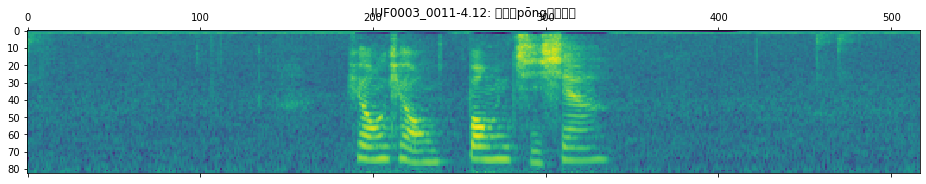

In [12]:
import json
import matplotlib.pyplot as plt
import kaldiio

# load 10-th speech/text in data.json
root = "./"
with open(root + "/dump/test/deltafalse/data.json", "r",encoding='utf-8') as f:
    test_json = json.load(f)["utts"]

key, info = list(test_json.items())[10]

# plot the speech feature
fbank = kaldiio.load_mat(info["input"][0]["feat"])
plt.matshow(fbank.T[::-1])
plt.title(key + ": " + info["output"][0]["text"])

In [19]:
import json
import torch
import argparse
from espnet.bin.asr_recog import get_parser
from espnet.nets.pytorch_backend.e2e_asr import E2E

root = "./"
model_dir = root + "/exp/train_nodev_pytorch_aishell_train/results"

# load model
with open(model_dir + "/model.json", "r",encoding='utf-8') as f:
    idim, odim, conf = json.load(f)
model = E2E(idim, odim, argparse.Namespace(**conf))
model.load_state_dict(torch.load(model_dir + "/model.loss.best"))
model.cpu().eval()

# load token dict
with open(root + "/data/lang_1char/train_nodev_units.txt", "r",encoding='utf-8') as f:
    token_list = [entry.split()[0] for entry in f]
token_list.insert(0, '<blank>')
token_list.append('<eos>')

# recognize speech
parser = get_parser()
args = parser.parse_args(["--beam-size", "2", "--ctc-weight", "1.0", "--result-label", "out.json", "--model", ""])
result = model.recognize(fbank, args, token_list)
s = "".join(conf["char_list"][y] for y in result[0]["yseq"]).replace("<eos>", "").replace("<space>", " ").replace("<blank>", "")

print("groundtruth:", info["output"][0]["text"])
print("prediction: ", s)

/home/nlp/.local/lib/python3.6/site-packages/chainer/backends/cuda.py:143: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cudnn).
  'cuDNN is not enabled.\n'


RuntimeError: version_ <= kMaxSupportedFileFormatVersion INTERNAL ASSERT FAILED at /pytorch/caffe2/serialize/inline_container.cc:132, please report a bug to PyTorch. Attempted to read a PyTorch file with version 3, but the maximum supported version for reading is 2. Your PyTorch installation may be too old. (init at /pytorch/caffe2/serialize/inline_container.cc:132)
frame #0: c10::Error::Error(c10::SourceLocation, std::string const&) + 0x33 (0x7f632df0a193 in /usr/local/lib/python3.6/dist-packages/torch/lib/libc10.so)
frame #1: caffe2::serialize::PyTorchStreamReader::init() + 0x1f5b (0x7f63310929eb in /usr/local/lib/python3.6/dist-packages/torch/lib/libtorch.so)
frame #2: caffe2::serialize::PyTorchStreamReader::PyTorchStreamReader(std::string const&) + 0x64 (0x7f6331093c04 in /usr/local/lib/python3.6/dist-packages/torch/lib/libtorch.so)
frame #3: <unknown function> + 0x6c53a6 (0x7f6378fc33a6 in /usr/local/lib/python3.6/dist-packages/torch/lib/libtorch_python.so)
frame #4: <unknown function> + 0x2961c4 (0x7f6378b941c4 in /usr/local/lib/python3.6/dist-packages/torch/lib/libtorch_python.so)
frame #5: _PyCFunction_FastCallDict + 0x35c (0x566ddc in /usr/bin/python3)
frame #6: /usr/bin/python3() [0x594b71]
frame #7: /usr/bin/python3() [0x54a325]
frame #8: /usr/bin/python3() [0x5517c1]
frame #9: _PyObject_FastCallKeywords + 0x19c (0x5a9eec in /usr/bin/python3)
frame #10: /usr/bin/python3() [0x50a783]
frame #11: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #12: /usr/bin/python3() [0x507f24]
frame #13: _PyFunction_FastCallDict + 0x2e2 (0x509202 in /usr/bin/python3)
frame #14: /usr/bin/python3() [0x594b01]
frame #15: /usr/bin/python3() [0x54a17f]
frame #16: /usr/bin/python3() [0x5517c1]
frame #17: _PyObject_FastCallKeywords + 0x19c (0x5a9eec in /usr/bin/python3)
frame #18: /usr/bin/python3() [0x50a783]
frame #19: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #20: /usr/bin/python3() [0x507f24]
frame #21: /usr/bin/python3() [0x509c50]
frame #22: /usr/bin/python3() [0x50a64d]
frame #23: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #24: /usr/bin/python3() [0x507f24]
frame #25: /usr/bin/python3() [0x5165a5]
frame #26: /usr/bin/python3() [0x50a47f]
frame #27: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #28: /usr/bin/python3() [0x58e3ea]
frame #29: _PyEval_EvalFrameDefault + 0x19dc (0x50d78c in /usr/bin/python3)
frame #30: /usr/bin/python3() [0x58e3ea]
frame #31: _PyEval_EvalFrameDefault + 0x19dc (0x50d78c in /usr/bin/python3)
frame #32: /usr/bin/python3() [0x58e3ea]
frame #33: /usr/bin/python3() [0x50a51c]
frame #34: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #35: /usr/bin/python3() [0x509918]
frame #36: /usr/bin/python3() [0x50a64d]
frame #37: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #38: /usr/bin/python3() [0x509918]
frame #39: /usr/bin/python3() [0x50a64d]
frame #40: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #41: /usr/bin/python3() [0x507f24]
frame #42: _PyFunction_FastCallDict + 0x2e2 (0x509202 in /usr/bin/python3)
frame #43: /usr/bin/python3() [0x594b01]
frame #44: PyObject_Call + 0x3e (0x59fe1e in /usr/bin/python3)
frame #45: _PyEval_EvalFrameDefault + 0x17e6 (0x50d596 in /usr/bin/python3)
frame #46: /usr/bin/python3() [0x507f24]
frame #47: /usr/bin/python3() [0x509c50]
frame #48: /usr/bin/python3() [0x50a64d]
frame #49: _PyEval_EvalFrameDefault + 0x1226 (0x50cfd6 in /usr/bin/python3)
frame #50: /usr/bin/python3() [0x58e809]
frame #51: /usr/bin/python3() [0x513def]
frame #52: /usr/bin/python3() [0x50a47f]
frame #53: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #54: /usr/bin/python3() [0x507f24]
frame #55: /usr/bin/python3() [0x509c50]
frame #56: /usr/bin/python3() [0x50a64d]
frame #57: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #58: /usr/bin/python3() [0x58e809]
frame #59: /usr/bin/python3() [0x513def]
frame #60: /usr/bin/python3() [0x50a47f]
frame #61: _PyEval_EvalFrameDefault + 0x444 (0x50c1f4 in /usr/bin/python3)
frame #62: /usr/bin/python3() [0x507f24]
frame #63: /usr/bin/python3() [0x509c50]


In [13]:
import os
import kaldiio
from IPython.display import Audio


try:
    d = os.getcwd()
    os.chdir(root)
    sr, wav = kaldiio.load_scp("data/test/wav.scp")[key]
finally:
    os.chdir(d)
Audio(wav, rate=sr)